## Setting

In [1]:
# import jieba 並使用繁中字典
import jieba.analyse
jieba.set_dictionary("../Dict/jieba_dict/dict.txt.big.txt")

In [6]:
list(jieba.cut("測試文字"))

Building prefix dict from D:\Documents\Jupyter Notebook\DL Pratice\Dict\jieba_dict\dict.txt.big.txt ...
Dumping model to file cache C:\Users\owo-a\AppData\Local\Temp\jieba.ud0a3c5781791294eac86f15730d94f4b.cache
Loading model cost 2.206 seconds.
Prefix dict has been built succesfully.


['測試', '文字']

## 提取關鍵字次數

### jieba關鍵字提取
+ `jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())`
    + sentence 为待提取的文本
    + topK 为返回几个 TF/IDF 权重最大的关键词，默认值为 20
    + withWeight 为是否一并返回关键词权重值，默认值为 False
    + allowPOS 仅包括指定词性的词，默认值为空，即不筛选
+ `jieba.analyse.TFIDF(idf_path=None)` 新建 TFIDF 实例，idf_path 为 IDF 频率文件

詳見：https://github.com/fxsjy/jieba

In [9]:
# 將乾杯這首歌的關鍵字詞取出來 
# topK代表要取的關鍵字次數 
with open("data/single_song.txt", "rb") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line,
                                          topK=10, 
                                          withWeight=True)
        for tag, weight in tags:
            print(tag + "\t" + str(weight))

不會	0.3290302982449541
時間	0.27419191520412844
歲月	0.27419191520412844
回憶	0.27419191520412844
一天	0.27151268890738534
也許	0.21935353216330275
終點	0.21935353216330275
舉起	0.21935353216330275
懷念	0.21935353216330275
悠悠的	0.2169034148678899


In [10]:
# 把每首歌的tags取出
with open("data/test1.txt", "rb") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line,10)
        print(",".join(tags))

不會,時間,歲月,回憶,一天,也許,終點,舉起,懷念,悠悠的

我們,哪裡,從不,相識,那個,場景,出現,不曾,相遇,每秒

我們,好好,一隻,不過,沒有,變老,時間,喧囂,最後,知道

後來,我們,人生,無論是,淚水,一個,期待,中能,然後,回憶

滾燙,入陣曲,無悔,夜未央,天未亮,倖存,沙場,臉龐,淚未,心未涼

最好,day,一天,閉上眼,瞬間,銀河,好了沒,best,那天,地球

OAOA,一個,短暫,人生,飢渴,腳尖,一種,無止盡,和諧,復活

la,will,孤單,high,everything,alright,Tomorrow,fine,High,陪伴

oh,party,hey,let,go,night,lonely,我們,派對,動物

什麼,能夠,拯救,殘酷,攻擊,那麼,束手無策,愛情,結局,地球

決定,快樂,保護色,不愛了,靈魂,永遠,鎖上,軀殼,真正,不恨

一個,兄弟,我們,這樣,怎樣,一次,身旁,人生,一場,變成

過嗎,人生,部門,沒有,富貴榮華,目標,飛黃騰達,請假,無限,有限

盡頭,怎麼樣,終點,可有光,我們,成名,那夜,起點,可會亮,綻放

變成,交響,每個,孤單,一個,人唱,沒人,還有,崩壞,我心

記得,卡片,西天,夥伴,掏耳朵,累不累,兵荒馬亂,改變,滿天,人類

怎麼,擁有,快樂,足夠,一陣風,吹來,風箏,祈禱,感動,終於

我們,人們,無數,未來,如海,怎樣,命運,流轉,相異,羅盤

yeah,出現,有沒有,呼喚,越來越,一種,電影,情節,黎明,無法

頑固,一次,深處,活在,淚滴,拼回,一天,吞下,相信,自己

do,ever,shine,die,現在,try,出來,jalalan,jalalala,沒有

何時,看見,人們,改變,夢寐以求,容顏,擁有,問你,春天,就算

煩惱,噗通,甩掉,跳越,丟掉,地球,一顆,一瞬間,忘掉,再也

love,ing,戀愛,改變,黃昏,happy,噴射機,黎明,心情,心跳

我們,任意,那個,走過,唱片,無數,無盡,歲月,搭著,環遊

有沒有,回憶,自傳,最終,最愛,愛情,遺忘,原來,飛翔,身旁

什麼,決定,快樂,傷心,就讓,之後,潮落,潮起,整個,拋棄

動次,快樂,oh,不管,慢歌,反正,感覺,活著,趴著,音樂

一層,聽到,空氣,洋蔥,永遠,願意,剝開,沉默,偷偷,如果


In [16]:
# 將每首歌的前10個tags存檔
import codecs
wtags = codecs.open("data/lyrics_tags.txt", "w",encoding="utf-8")
with open("data/test1.txt", "r",encoding="utf-8") as f1:
    for line in f1:
        words = jieba.analyse.extract_tags(line,10)
        wtags.write(" ".join(words))
f1.close()

# 把所有歌的前10個tags變為萃取資料的input
with open("data/lyrics_tags.txt", "rb") as f2:
    for line in f2:
        tags = jieba.analyse.extract_tags(line,15)
        print(",".join(tags))
f2.close()

我們,回憶,沒有,一個,快樂,孤單,什麼,改變,人生,時間,歲月,終點,那個,出現,一隻


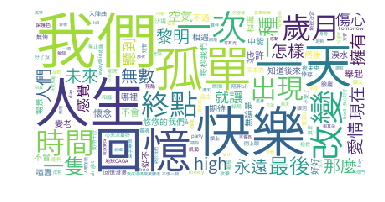

<Figure size 1000x600 with 0 Axes>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# 讀取每首歌的前10個tags
text = open("data/lyrics_tags.txt",encoding="utf-8").read()
# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = {}.fromkeys(["沒有","一個","什麼","那個"])
# 產生文字雲
wc = WordCloud(font_path=r'C:\Windows\Fonts\GenYoGothicTW-Normal.ttf', #設置字體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞
wc.generate(text)
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()